### python libraries - toolkits for modern-day analysts


# download data

### import libaries

In [2]:
# access libaries
import yfinance as yf
import sqlite3

# scientific computing pandas (data structures & tools), NumPy (array & tools), SciPy (Integrals, solving differential equations, optimization)
import pandas as pd
import numpy as np
from scipy import stats

# Visualization matplotlib (plots & graphs, most popular), seaborn (plots: heat maps, time series, violin plots)
import matplotlib.pyplot as plt
import seaborn as sns


# Algorithmic scikit-learn (machine learning: Regression, classification, and so on), statsmodels (explore data, estimate statistical models, and perform statistical tests)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### stock class

In [32]:
class stock_orig:
    def __init__(self,ticker_symbol):

        # load data
        self.ticker_symbol = ticker_symbol
        self.company_name = yf.Ticker(self.ticker_symbol).info['longName'].replace(r'/', ' ')
        self.currency = yf.Ticker(self.ticker_symbol).info['currency']

        self.company_stock_prices = []
            
        self.aux_var_count = []

        self.first_aux_var_boxp = []

    # ------------------------ DATABASE -----------------------------------------

        # load data download
    def download_stock_prices(self):
        self.company_stock_prices = yf.download(self.ticker_symbol, start="2021-11-01", end="2024-03-31")
        self._company_name
        
        # load data csv
    def load_csv_data(self):
        self.company_stock_prices = pd.read_csv('data/' + self.company_name + '.csv')
    
        #save data to csv
    def save_csv_data(self):
        self.company_stock_prices.to_csv('data/' + self.company_name + '.csv')    
        
        # save data to sql
    def to_sqlite_database(self):
        conn = sqlite3.connect('stocks_orig.db')
        self.company_stock_prices.to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close()   

    # ------------------------ DATA -----------------------------------------

    def value_counts(self):
       
        #load data
        first_aux_var_count = pd.read_csv('data/' + self.company_name + '.csv')
        
        # convert item
        first_aux_var_count = first_aux_var_count['Close'].astype(np.int8)

        # count item
        self.aux_var_count = first_aux_var_count.value_counts()  

    def pearson_coeff(self, ticker_symbol):
 
        # get company name
        company_name = yf.Ticker(ticker_symbol).info['longName'].replace(r'/', ' ')

        # load data
        first_aux_var_corr = pd.read_csv('data/' + self.company_name + '.csv')
        first_aux_var_corr = first_aux_var_corr[['Date','Close']] #.astype(np.float64)
        second_aux_var_corr = pd.read_csv('data/' + company_name + '.csv')
        second_aux_var_corr = second_aux_var_corr[['Date','Close']] #.astype(np.float64)

        # rename Series for df
        first_item = first_aux_var_corr.rename(columns={"Date" : "date", "Close": "close_first_item"})
        second_item = second_aux_var_corr.rename(columns={"Date" : "date", "Close": "close_second_item"})

        # build df
        aux_var_corr_df = pd.merge(first_item, second_item, how = "inner", on = ['date', 'date'])
        #print(aux_var_corr_df.head(2))

        # calculate coefficient
        pearson_coef, p_value = stats.pearsonr(aux_var_corr_df['close_first_item'], aux_var_corr_df['close_second_item'])
        print(company_name)
        print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    

    # ------------------------ VISUALISATION -----------------------------------------


    def correlation_plot(self):

        g = sns.PairGrid(self.first_aux_var_boxp, y_vars=["WOOE.AS"], x_vars=["WY", "SCA-B.ST",'SUZ', 'SK3.IR', 'IP'], height=4)
        h = sns.PairGrid(self.first_aux_var_boxp, y_vars=["WOOE.AS"], x_vars=['STERV.HE','RYN', 'WFG', 'WRK', 'PCH'], height=4) # y_vars tips = ETF, x_vars = all stocks

        g.map(sns.regplot, color=".3")
        h.map(sns.regplot, color=".3")

        g.figure.subplots_adjust(wspace=.02, hspace=.02)
        h.figure.subplots_adjust(wspace=.02, hspace=.02)

    def correlation_var(self,company_name):

        #load data
        self.load_csv_data()
        first_aux_var_corr = self.company_stock_prices['Close'].astype(np.float64)
        second_aux_var_corr = pd.read_csv('data/' + company_name + '.csv')
        second_aux_var_corr = second_aux_var_corr['Close'].astype(np.float64)
        
        # rename Series for df
        first_item = first_aux_var_corr.rename(self.company_name)
        second_item = second_aux_var_corr.rename(company_name)

        # build df
        aux_var_corr_df = pd.concat([first_item, second_item], axis=1)

        # plot graph
        print(aux_var_corr_df[[self.company_name, company_name]].corr())      

    def boxplot(self):

        # use to set style of background of plot
        sns.set_theme(style="whitegrid")

        # print boxplot
        ax = sns.boxplot(data =self.first_aux_var_boxp)
        ax.tick_params(axis='x', labelrotation=45)

        # plot data one company     
    def plot_stock_data(self):
        self.load_csv_data()
        self.company_stock_prices['Close'].plot()
        plt.title(self.company_name)
        plt.show()

   

###  download and store

In [34]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH', 'EURUSD=X']
print(ticker_symbols)

for ticker_symbol in ticker_symbols: 
    stock_obj = stock_orig(ticker_symbol)
    stock_obj.download_stock_prices()
    stock_obj.save_csv_data()
    stock_obj.to_sqlite_database()

['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE', 'RYN', 'WFG', 'WRK', 'PCH', 'EURUSD=X']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# understand data - ETF

In [5]:
stock_orig_obj = stock_orig('WOOE.AS')

## describe data

In [44]:
stock_orig_obj.load_csv_data()
aux_var_dataframe = stock_orig_obj.company_stock_prices[['Date', 'Close']]
aux_var_dataframe.describe(include = 'all')

,Date,Close
count,609,609.000000
unique,609,NaN
top,2021-11-05,NaN
freq,1,NaN
mean,NaN,26.670818
std,NaN,2.267329
min,NaN,22.730000
25%,NaN,25.087999
50%,NaN,26.042700
75%,NaN,28.146299


## min and max

In [28]:
aux_var_min = aux_var_dataframe.loc[aux_var_dataframe['Close'] <= 22.730000, 'Date']
print(aux_var_min.head())

372    2023-04-27
Name: Date, dtype: object


In [29]:
aux_var_max = aux_var_dataframe.loc[aux_var_dataframe['Close'] >= 33.823799, 'Date']
print(aux_var_max.head())

43    2022-01-13
Name: Date, dtype: object


## plot graph

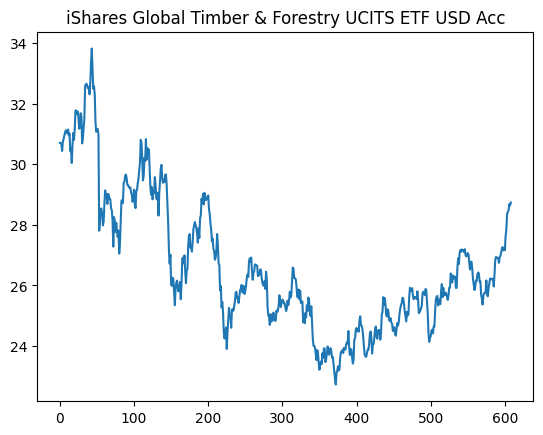

In [42]:
stock_orig_obj.plot_stock_data()

<font color='#5891db'>The ETF shown had a high at the beginning of 2022 and a low in the middle of 2023. The price increased until April 2024.</font>

# understand data - stocks

[*********************100%%**********************]  10 of 10 completed


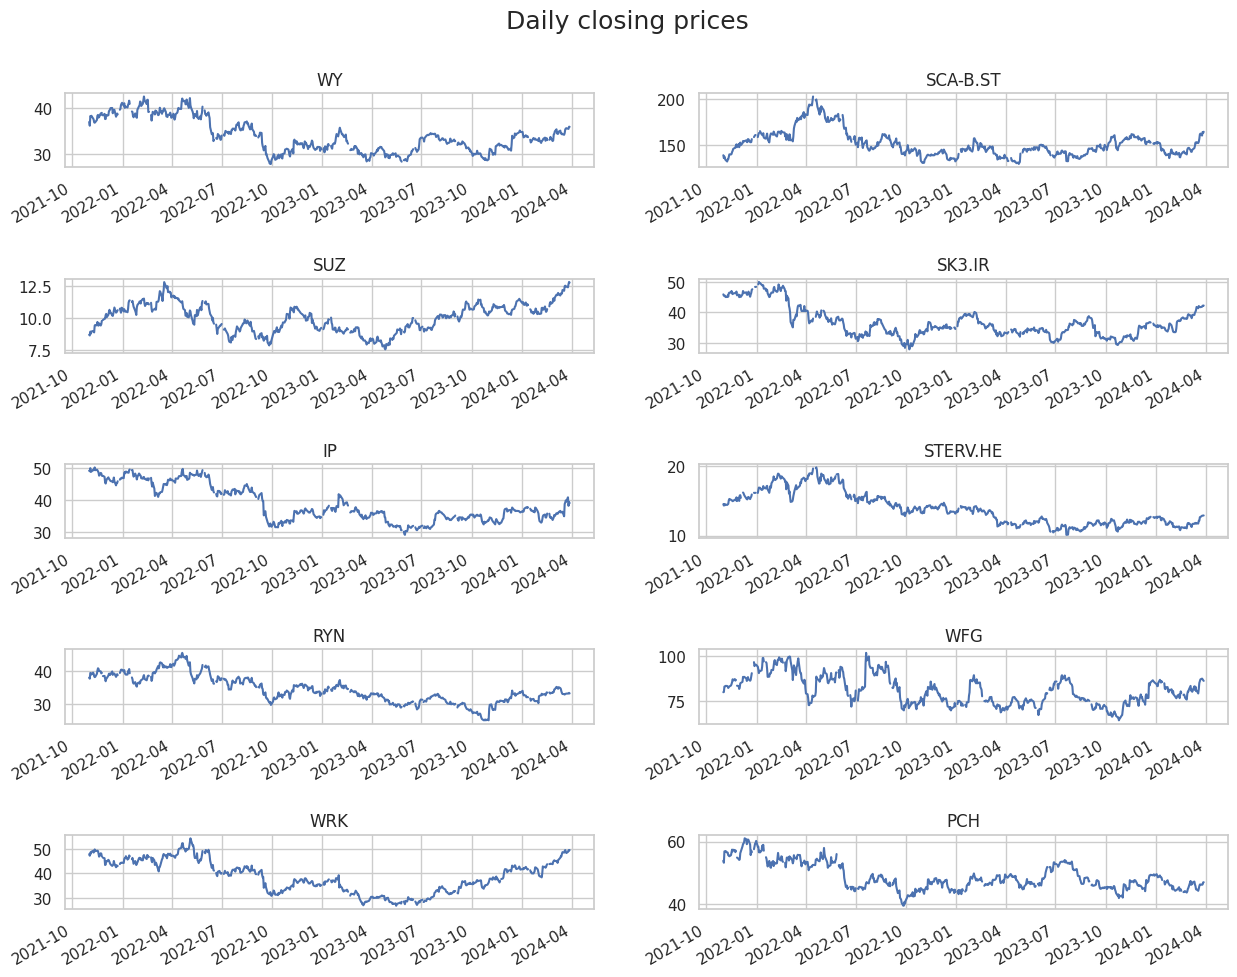

In [100]:
ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
prices = yf.download(ticker_symbols, start="2021-11-01", end="2024-03-31")
df = prices['Close'].melt(ignore_index=False,var_name="ticker", value_name="closing_price")

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=1.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)


for ticker, ax in zip(ticker_symbols, axs.ravel()):
    df[df["ticker"] == ticker].plot(ax=ax)
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

<font color='#5891db'>In an initial visual assessment, all of the 10 graphs show high levels and 7 out of 10 graphs show low levels in the middle of 2023. In 7 out of 10 graphs the values ​​will increase again by April 2024.</font>

## boxplot

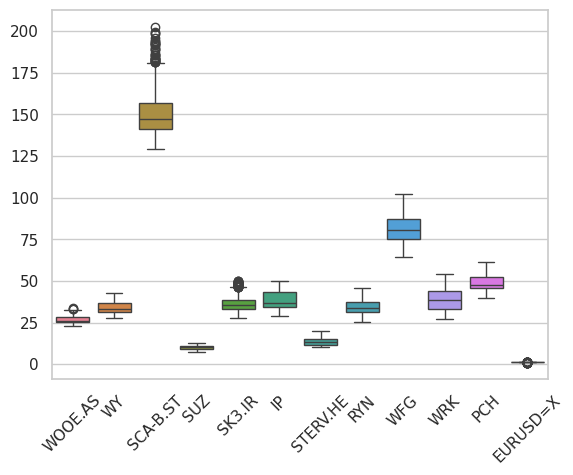

In [34]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
aux_var_stock_prices = []

for ticker_symbol in ticker_symbols: 

    # init class
    stock_orig_obj = stock_orig(ticker_symbol)

    # collect data
    first_item = pd.DataFrame(aux_var_stock_prices)
    stock_orig_obj.load_csv_data()

    # transform
    second_item = stock_orig_obj.company_stock_prices['Close'].astype(np.float64)
   
    # rename 
    aux_var_second_name = stock_orig_obj.company_name
    second_item = second_item.rename(ticker_symbol)

    # build dataframe
    aux_var_stock_prices = pd.concat([first_item, second_item], axis=1)

    
stock_orig_obj.first_aux_var_boxp = aux_var_stock_prices
stock_orig_obj.boxplot()

# regplot

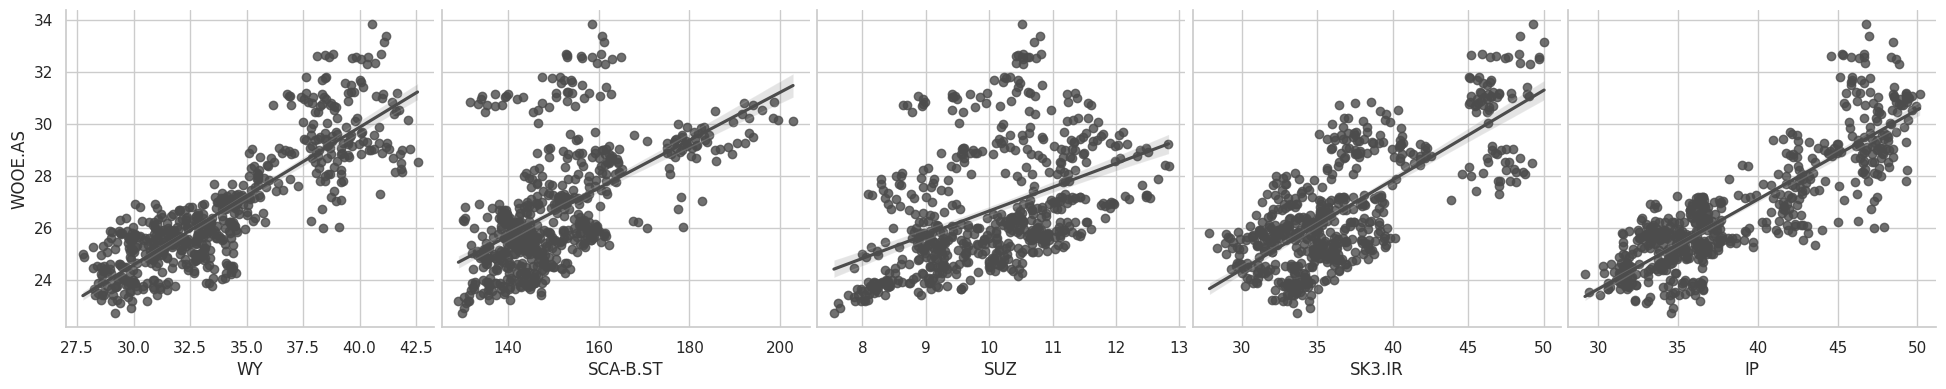

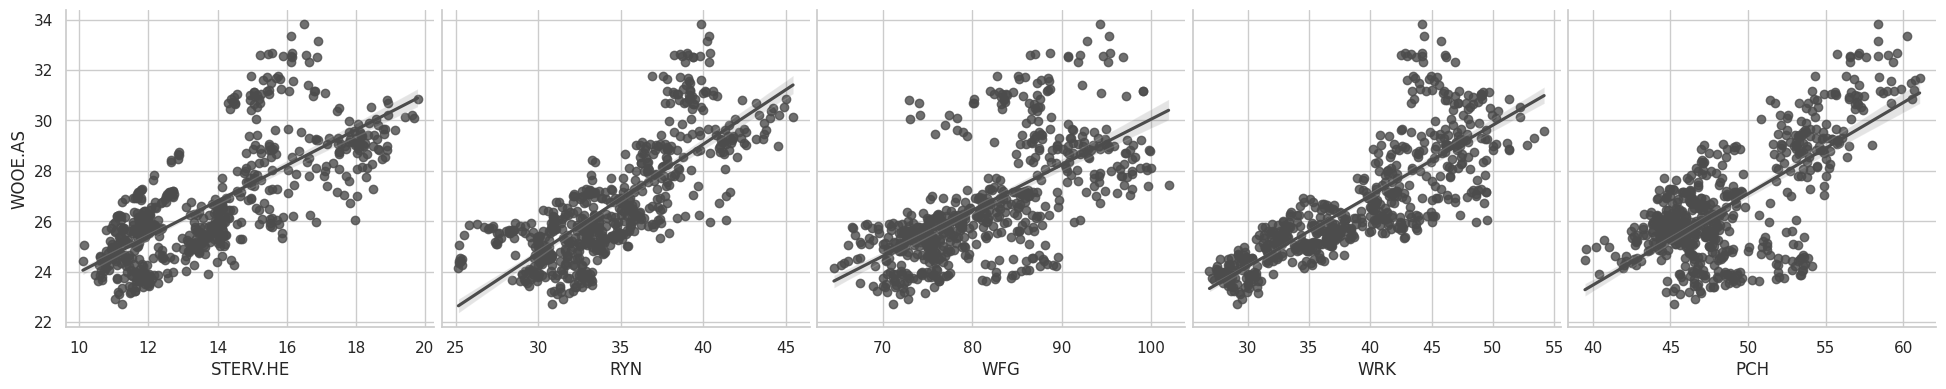

In [35]:
stock_orig_obj.correlation_plot()

In [37]:
ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
aux_var_stock_prices = []

for ticker_symbol in ticker_symbols:
    # init class
    stock_orig_obj = stock_orig('WOOE.AS') 
    stock_orig_obj.pearson_coeff(ticker_symbol)

Weyerhaeuser Company
The Pearson Correlation Coefficient is 0.8789036002263925  with a P-value of P = 3.765860265179996e-192
Svenska Cellulosa Aktiebolaget SCA (publ)
The Pearson Correlation Coefficient is 0.6239043457035505  with a P-value of P = 3.815041600195763e-66
Suzano S.A.
The Pearson Correlation Coefficient is 0.4790607382532125  with a P-value of P = 2.369178353654478e-35
Smurfit Kappa Group Plc
The Pearson Correlation Coefficient is 0.778006233770313  with a P-value of P = 4.949466213009703e-124
International Paper Company
The Pearson Correlation Coefficient is 0.8927338385630682  with a P-value of P = 8.8461597325244e-207
Stora Enso Oyj
The Pearson Correlation Coefficient is 0.767646843964861  with a P-value of P = 1.1951508516871356e-117
Rayonier Inc.
The Pearson Correlation Coefficient is 0.7817866014129691  with a P-value of P = 2.453146081725966e-123
West Fraser Timber Co. Ltd.
The Pearson Correlation Coefficient is 0.7035723040459692  with a P-value of P = 9.7041529806

In [54]:
stock_orig_obj.value_counts()
print(stock_orig_obj.aux_var_count)

Close
25    159
26     96
24     83
23     56
27     53
28     52
29     44
30     27
31     23
32     11
33      3
22      2
Name: count, dtype: int64


#  <font color='#bd1c3f'>LINEAR REGRESSION</font> <br>These questions arise

## 1. ETF - Price- Time

<font>1.1 Is there a linear temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 

#  <font color='#bd1c3f'>MULTIBLE LINEAR REGRESSION</font> <br>These questions arise

<font>1.1 Is there a linear temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 

#  <font color='#bd1c3f'>POLYNOMIAL REGRESSION</font> <br>These questions arise

## 1. ETF - Price- Time

<font>1.1 Is there a polynominal temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 